<a href="https://colab.research.google.com/github/HimanshuBro2006/Capstone-Project/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CapstoneProject

/content/drive/MyDrive/CapstoneProject


In [ ]:
!ls

CapstoneProject.ipynb  car_price_prediction.csv  DataForML.pkl	Final_KNN_Model.pkl


### This Project is based on the Car data available from Kaggle repository (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challengeLinks to an external site.).


*   It contains the details of 19236 cars.
*   My project task is to create a machine learning model which can predict the price of car based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.

### Step 1: Reading the dataset
Understanding the data and domain thoroughly is a crucial step in data analysis. It is essential to have a strong grasp of these aspects before attempting to implement any machine learning or AI algorithm.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

# Load the car dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path, encoding='latin')

# Removing duplicate rows
print('Shape before deleting duplicate values:', car_data.shape)
car_data = car_data.drop_duplicates()
print('Shape after deleting duplicate values:', car_data.shape)

car_data.head(10)


Shape before deleting duplicate values: (19237, 18)
Shape after deleting duplicate values: (18924, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4,Automatic,Front,4-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4,Automatic,Front,4-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4,Automatic,Front,4-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4,Automatic,Front,4-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,4-May,Left wheel,Silver,12


# Step 2 : Problem Statement Definition
* Creating  a prediction model to predict the price( Price ) of a car
* Target Variable: Price
Predictors/Features: Levy, Manufacturer, Model, Mileage, etc.

## Step 3: Target variable identification
* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.


# Step 4: Visualising the distribution of Target variable

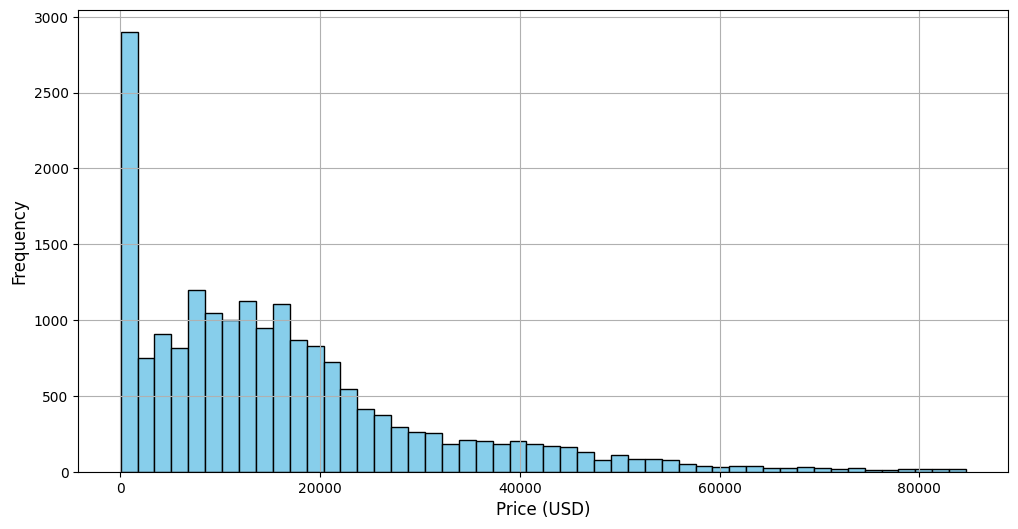

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)
# Clean the 'Price' column by converting to numeric and handling errors
car_data['Price'] = pd.to_numeric(car_data['Price'], errors='coerce')
# Drop rows with missing or NaN values in 'Price' column
car_data.dropna(subset=['Price'], inplace=True)
# Filter out extreme outliers using a percentile-based approach (e.g., keeping values within the 1st and 99th percentile)
lower_bound = np.percentile(car_data['Price'], 1)
upper_bound = np.percentile(car_data['Price'], 99)
filtered_data = car_data[(car_data['Price'] >= lower_bound) & (car_data['Price'] <= upper_bound)]
# Set up the plot
plt.figure(figsize=(12, 6))
# Create a histogram of the filtered 'Price' column with adjusted bins
plt.hist(filtered_data['Price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show grid lines for better visualization
plt.grid(True)
# Show the plot
plt.show()


## Observations from Step 4 - Visualising the distribution of Target variable
*The histogram represents the distribution of car prices in the dataset.

*The y-axis (Frequency) shows the count of cars falling within each price range (bin).

*The shape of the histogram indicates how prices are distributed across different ranges.

*As the price increases, the frequency of cars decreases. This observation suggests that higher-priced cars are less common in the dataset.


## Step 5: Data exploration at basic level
*There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
car_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [ ]:
car_data.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,4-May,Left wheel,White,12


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [ ]:
car_data.describe(include="all")

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,4-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


In [ ]:
car_data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

## Observations from Step 5 - Data exploration at basic level
*   Price. Continuous. Traget Variable.
*   Levy. Continuous. Selected.
*   Manufacturer. Categorical
*   Model. Categorical
*   Prod. year. Continuous. Selected.
*   Category. Categorical. Selected.
*   Leather interior. Categorical. Selected.
*   Fuel Type. Categorical. Selected.
*   Engine volume. Continuous. Selected.
*   Mileage. Continuous. Selected.
*   Cylinders. Categorical
*   Gear box type. Categorical. Selected.
*   Drive wheels. Categorical
*   Doors. Categorical
*   Wheel. Categorical
*   Color. Categorical. Selected.
*   Airbags. Categorical. Selected.


## Step 7: Identifying and Rejecting useless columns
* There are 12 qualitative columns in the data.
* Hence removing 6 columns.

## Step 8: Visual Exploratory Data Analysis
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted six categorical predictors in the data

Categorical Predictors:

* 'Airbags',
* 'Color'
* 'Gear box type'
* 'Fuel Type'
* 'Category'
*  'Leather interior'

* We will use bar charts to see how the data is distributed for these categorical columns.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlots = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlots[plotNumber])
        subPlots[plotNumber].set_title(colName)  # Set subplot title

        # Customize labels and layout
        subPlots[plotNumber].set_xlabel(colName)
        subPlots[plotNumber].set_ylabel('Count')

        # Rotate x-axis labels for better readability
        subPlots[plotNumber].tick_params(axis='x', rotation=90)

        # Add grid lines for better visualization
        subPlots[plotNumber].grid(True)

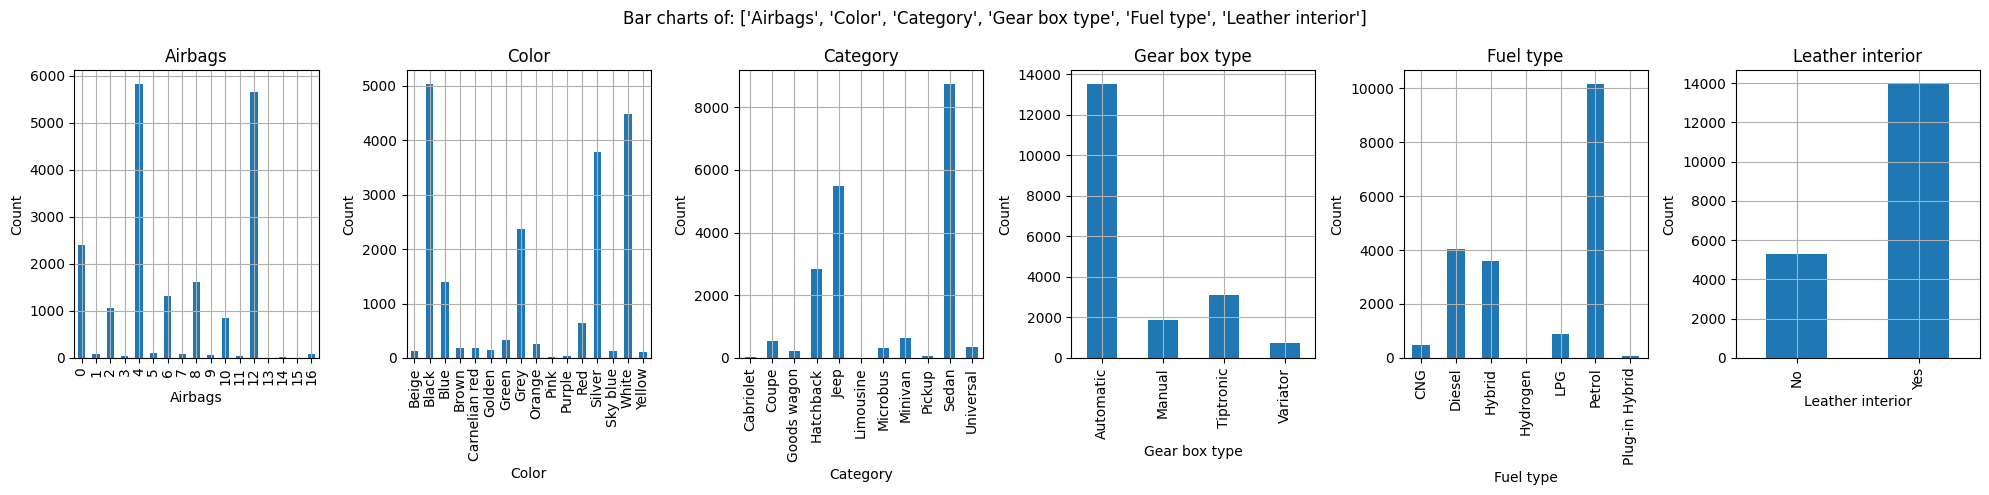

In [ ]:
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Specify the columns to plot
columns_to_plot = ['Airbags', 'Color', 'Category', 'Gear box type', 'Fuel type', 'Leather interior']

# Call the PlotBarCharts function with the specified columns
PlotBarCharts(inpData=car_data, colsToPlot=columns_to_plot)

# Show the plots
plt.tight_layout()
plt.show()

## Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the six data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency. * Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.

* Whenever in doubt, always investigate the column further.

* Selected Categorical Variables (**'Leather Interior', 'Airbags', 'Color', 'Fuel Type', 'Gear box type'**): All the categorical variables are selected for further analysis.

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are four continuous predictor variables 'Levy', 'Mileage', 'Prod. year', 'Engine volume'

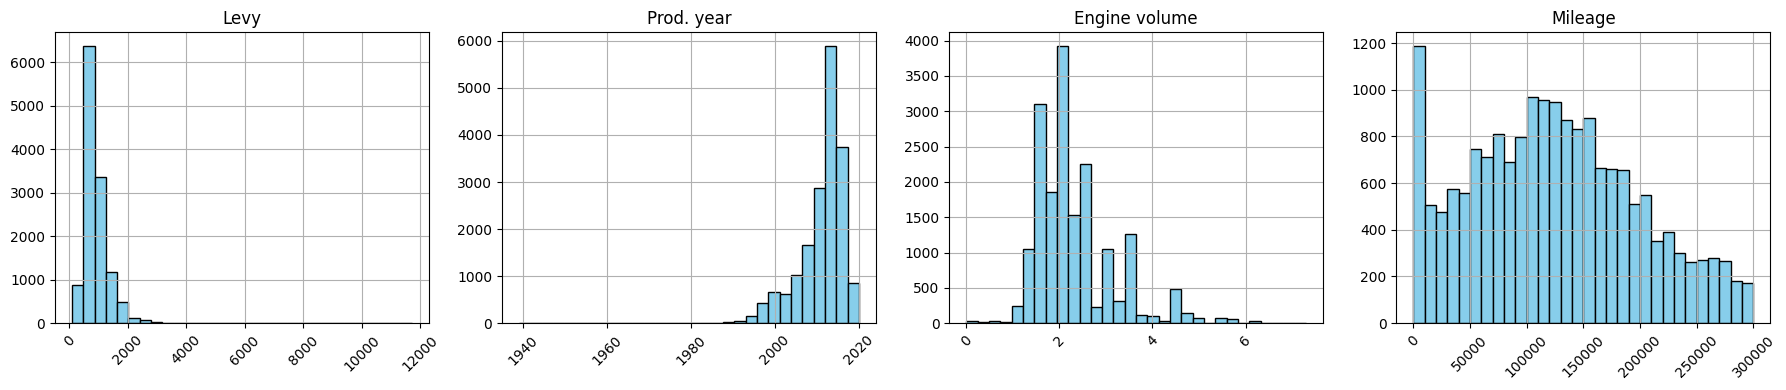

[<Axes: title={'center': 'Levy'}> <Axes: title={'center': 'Prod. year'}>
 <Axes: title={'center': 'Engine volume'}>
 <Axes: title={'center': 'Mileage'}>]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Convert 'Mileage' to numeric (handling errors and coercing to float)
car_data['Mileage'] = pd.to_numeric(car_data['Mileage'].str.replace(' km', ''), errors='coerce')

# Filter out extreme values for 'Mileage' (considering a reasonable upper limit)
reasonable_upper_limit = 300000  # Set a reasonable upper limit for mileage
car_data = car_data[car_data['Mileage'] <= reasonable_upper_limit]

# Clean 'Levy' column: Remove non-numeric characters and convert to numeric
car_data['Levy'] = pd.to_numeric(car_data['Levy'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Clean 'Engine volume' column: Extract numeric part and convert to numeric
car_data['Engine volume'] = pd.to_numeric(car_data['Engine volume'].str.extract('(\d+.\d+|\d+)')[0], errors='coerce')

# Define the columns to plot (excluding 'Mileage' since we will plot the cleaned version)
columns_to_plot = ['Levy', 'Prod. year', 'Engine volume']
num_bins = 30  # Number of histogram bins

# Create a figure with subplots arranged in a horizontal line
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot) + 1, figsize=(18, 4))

# Store the subplot axes in a variable
subplot_axes = axes

# Plot histograms for each column in a loop (excluding 'Mileage')
for col, ax in zip(columns_to_plot, axes[:-1]):
    car_data[col].hist(ax=ax, bins=num_bins, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot histogram for cleaned 'Mileage'
car_data['Mileage'].hist(ax=axes[-1], bins=num_bins, color='skyblue', edgecolor='black')
axes[-1].set_title('Mileage')
axes[-1].grid(True)
axes[-1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

# Print the representation of subplot axes
print(subplot_axes)


## Observations from Step 9

## Step 10: Removal of outliers and missing values

In [ ]:
car_data['Levy'] = pd.to_numeric(car_data['Levy'], errors='coerce')  # Convert non-numeric to NaN

# Filter and sort 'Levy' values that are less than 6000
filtered_levy = car_data['Levy'][car_data['Levy'] < 6000].sort_values(ascending=False)

# Print the sorted Levy values
print(filtered_levy)

5529     5908.0
5367     5877.0
17767    5681.0
14676    5679.0
2323     5679.0
          ...  
14642      87.0
3516       87.0
3105       87.0
2010       87.0
10603      87.0
Name: Levy, Length: 12523, dtype: float64


Observation: Above result shows the nearest logical value is 5908, hence, replacing any value above 6000 with it.

In [ ]:
car_data['Levy'][car_data['Levy']>6000] =5908

## Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'Levy'}>]], dtype=object)

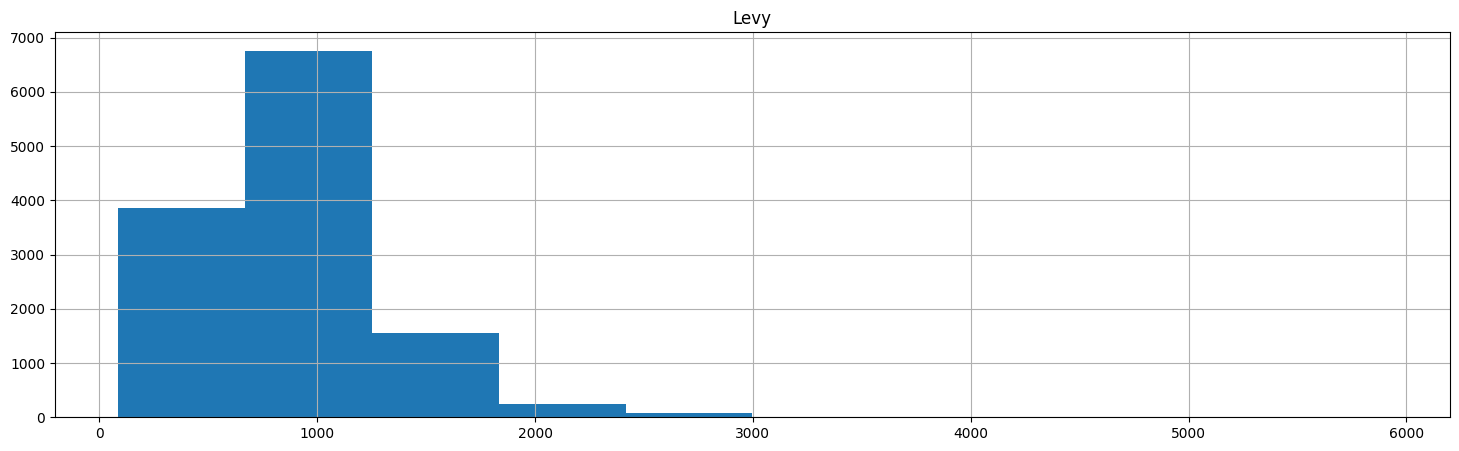

In [ ]:
car_data.hist(['Levy'], figsize=(18,5))

## Observation from Step 11
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## Step 12: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
car_data.isnull().sum()

ID                     0
Price                  0
Levy                5497
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

##Observations from Step 12: Missing Value Analysis
* There are 5497 values of Levy in this data.


## Step 13: Feature Selection (Attribute Selection)

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

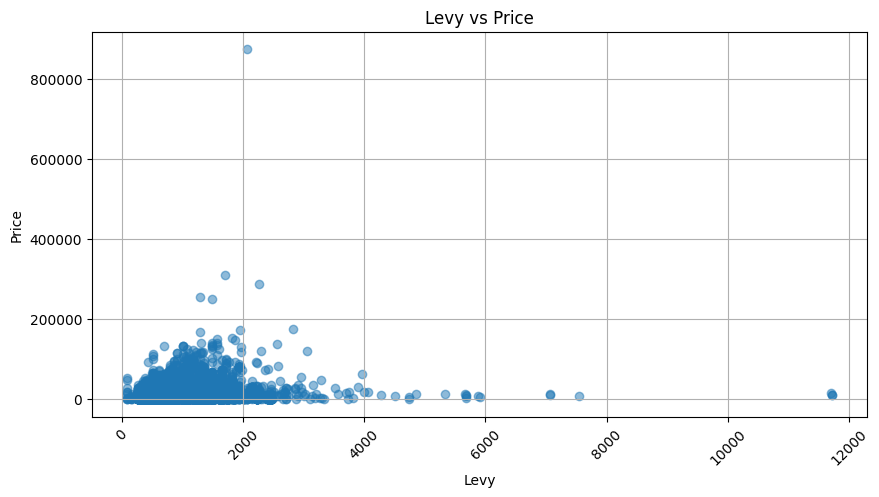

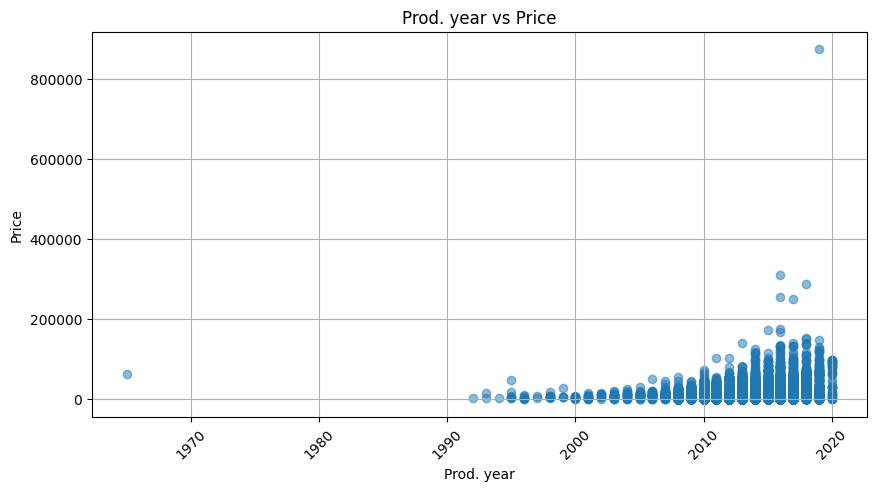

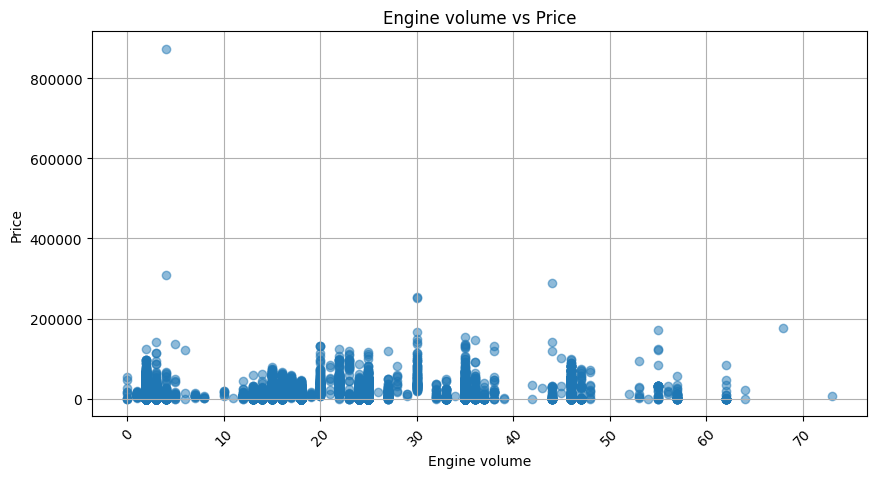

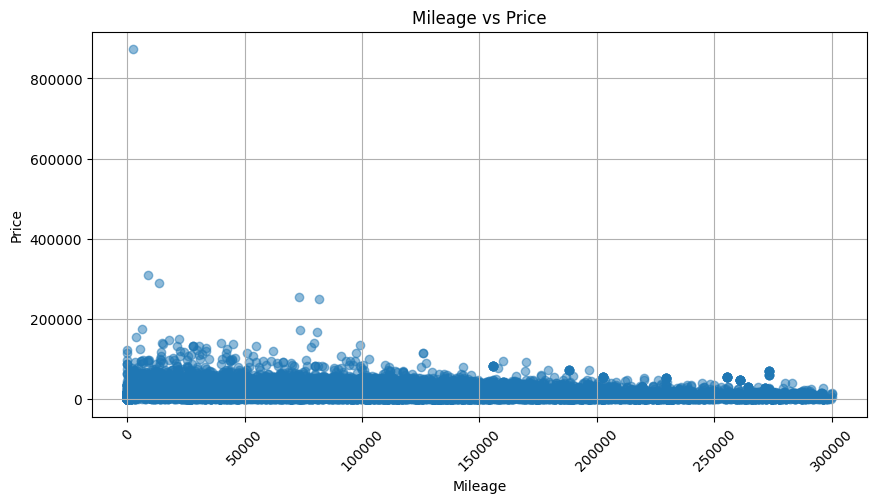

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Define a function to clean numeric columns
def clean_numeric_column(column):
    return pd.to_numeric(column.str.replace(r'\D', '', regex=True), errors='coerce')

# Clean specified columns
car_data['Levy'] = clean_numeric_column(car_data['Levy'])
car_data['Engine volume'] = clean_numeric_column(car_data['Engine volume'])
car_data['Mileage'] = clean_numeric_column(car_data['Mileage'])

# Set a reasonable upper limit for mileage
reasonable_upper_limit = 300000

# Filter out extreme values for 'Mileage'
car_data = car_data[car_data['Mileage'] <= reasonable_upper_limit].copy()

# Drop rows with missing values after cleaning
car_data.dropna(subset=['Levy', 'Engine volume', 'Mileage'], inplace=True)

# Define features and target variable
features = ['Levy', 'Prod. year', 'Engine volume', 'Mileage']
target = 'Price'

# Plot scatterplots for each feature vs. Price
for feature in features:
    plt.figure(figsize=(10, 5))
    plt.scatter(car_data[feature], car_data[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


## Scatter charts interpretation

* The scatter plot of Prod. year VS Price are directly proportional to each other as the prod. year increases the price of the car also increases. This is good for ML model building!
* The scatter plot of Mileage VS Price are inversely proportional to each other as the mileage increases the price of the car decreases. This is also good for ML model building!
* The scatter plot of Engine volume VS Price doesn't have clear trend. Hence that predictor/feature may not be the best one for ML model building.
* The scatter plot of Levy VS Price doesn't have clear trend. Hence that predictor/feature may not be the best one for ML model building.


## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [ ]:
ContinuousCols=['Price', 'Engine volume', 'Mileage', 'Prod. year','Levy']
# Creating the correlation matrix
CorrelationData=car_data[ContinuousCols].corr()
CorrelationData

,Price,Engine volume,Mileage,Prod. year,Levy
Price,1.000000,-0.009779,-0.228925,0.288326,0.066482
Engine volume,-0.009779,1.000000,0.157282,-0.102967,0.405081
Mileage,-0.228925,0.157282,1.000000,-0.408802,0.075415
Prod. year,0.288326,-0.102967,-0.408802,1.000000,-0.219779
Levy,0.066482,0.405081,0.075415,-0.219779,1.000000


In [ ]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.2 ]

Price         1.000000
Mileage      -0.228925
Prod. year    0.288326
Name: Price, dtype: float64

## Observations from Step 14
* Final selected Continuous columns:

* **'Mileage', 'Prod. year'**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

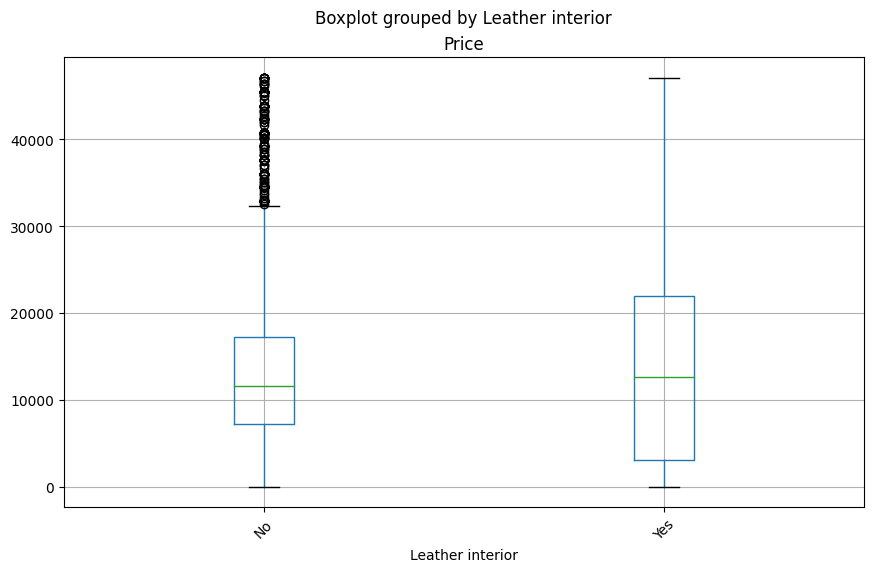

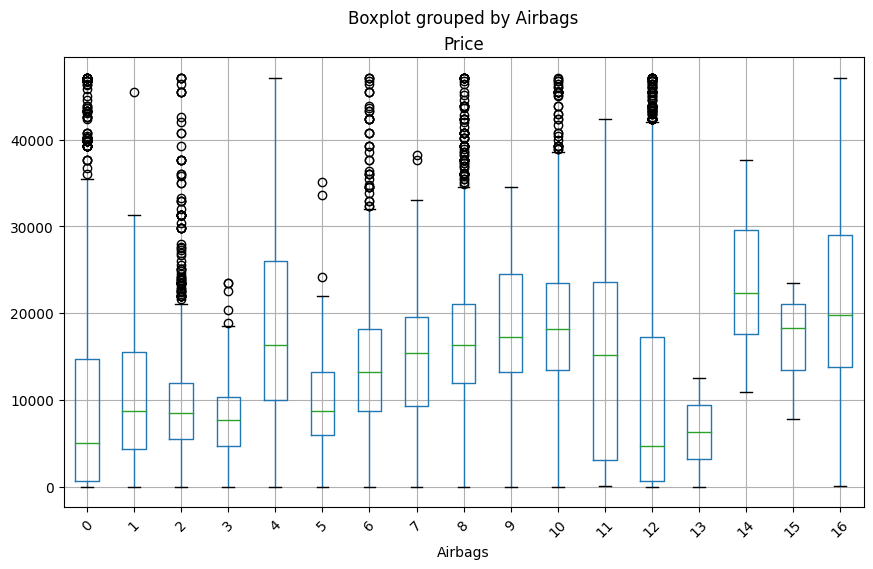

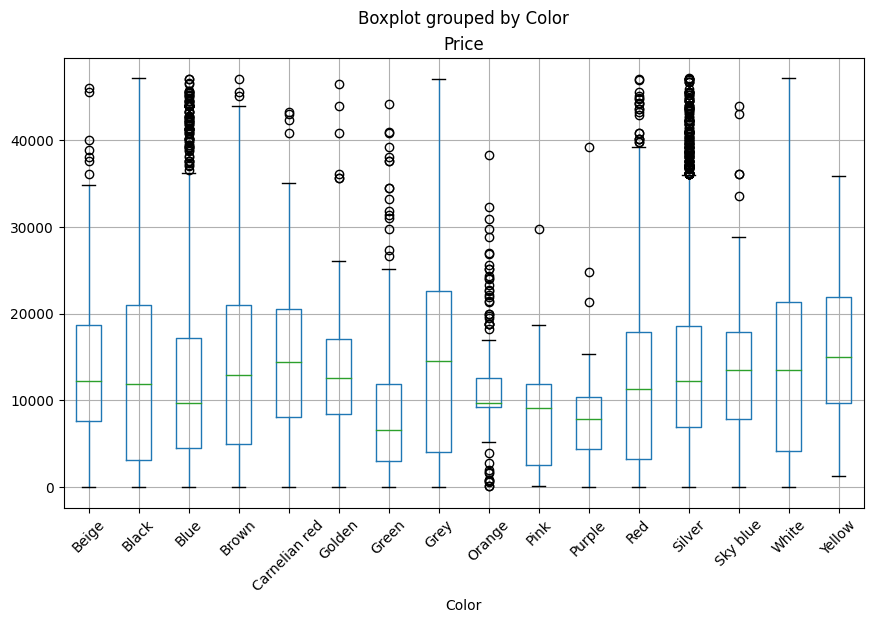

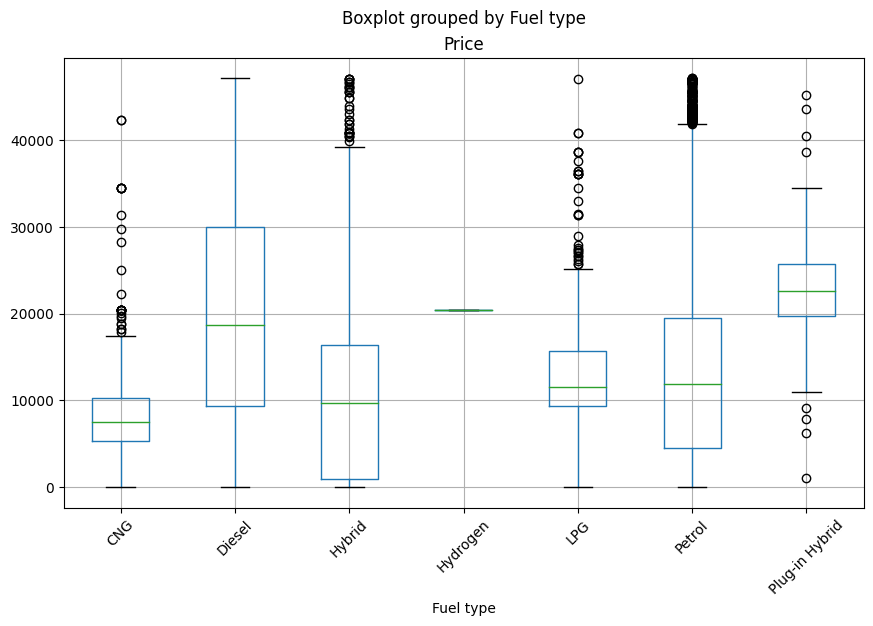

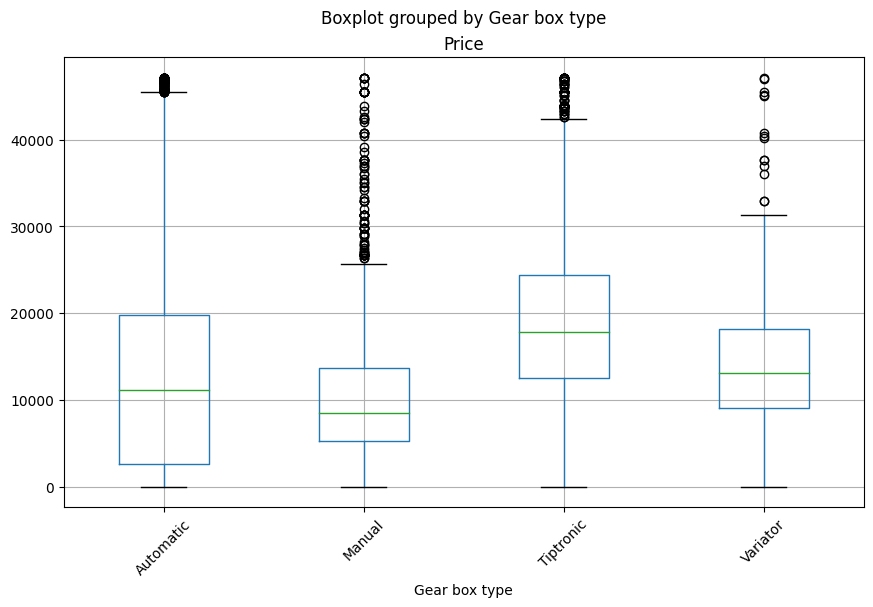

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Remove outliers from 'Price' column using IQR method
Q1 = car_data['Price'].quantile(0.25)
Q3 = car_data['Price'].quantile(0.75)
IQR = Q3 - Q1
price_lower_bound = Q1 - 1.5 * IQR
price_upper_bound = Q3 + 1.5 * IQR
car_data_cleaned = car_data[(car_data['Price'] >= price_lower_bound) & (car_data['Price'] <= price_upper_bound)]

# Define categorical predictors
categorical_cols = ['Leather interior', 'Airbags', 'Color', 'Fuel type', 'Gear box type']

# Plot box plots for each categorical predictor against 'Price'
for predictor in categorical_cols:
    car_data_cleaned.boxplot(column='Price', by=predictor, figsize=(10, 6))
    plt.xticks(rotation=45)
    plt.show()

## Observations from Step 15: Box-Plots interpretation

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Leather interior', 'Airbags', 'Color', 'Fuel type', 'Gear box type']
FunctionAnova(inpData=car_data,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Leather interior is NOT correlated with Price | P-Value: 0.9166911167322862
Airbags is NOT correlated with Price | P-Value: 0.7700403207033426
Color is NOT correlated with Price | P-Value: 0.6860657394413598
Fuel type is correlated with Price | P-Value: 0.00041124931980600685
Gear box type is correlated with Price | P-Value: 0.013657249046912035


['Fuel type', 'Gear box type']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* Only two categorical variables are correlated with the Target variable.

* Final selected Categorical columns:

 * 'Fuel type', 'Gear box type'


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
 * **'Mileage', 'Prod. year', 'Fuel type', 'Gear box type'**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

SelectedColumns=['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']

# Selecting final columns
DataForML=car_data[SelectedColumns]
DataForML.head()

,Mileage,Prod. year,Fuel type,Gear box type
0,186005 km,2010,Hybrid,Automatic
1,192000 km,2011,Petrol,Tiptronic
2,200000 km,2006,Petrol,Variator
3,168966 km,2011,Hybrid,Automatic
4,91901 km,2014,Petrol,Automatic


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Define selected columns for modeling
selected_columns = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type', 'Price']

# Create a copy of the selected columns
DataForML = car_data[selected_columns].copy()

# Clean 'Mileage' column: Remove non-numeric characters and convert to float
DataForML['Mileage'] = DataForML['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = DataForML['Fuel type'].mode()[0]
DataForML['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
label_encoder = LabelEncoder()
DataForML['Fuel type'] = label_encoder.fit_transform(DataForML['Fuel type'])
DataForML['Gear box type'] = label_encoder.fit_transform(DataForML['Gear box type'])

# Create DataForML_Numeric with dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Print sample rows of DataForML_Numeric
DataForML_Numeric.head()


,Mileage,Prod. year,Fuel type,Gear box type,Price
0,186005.0,2010,2,0,13328
1,192000.0,2011,5,2,16621
2,200000.0,2006,5,3,8467
3,168966.0,2011,2,0,3607
4,91901.0,2014,5,0,11726


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
import pandas as pd

# Define file path
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'

# Read the dataset
car_data = pd.read_csv(file_path)

# Define selected columns for modeling
selected_columns = ['Mileage', 'Prod. year', 'Price', 'Fuel type', 'Gear box type']

# Filter the DataFrame to include only selected columns
DataForML = car_data[selected_columns]

# Print existing column names in DataForML
print(DataForML.columns)
specified_columns = ['Mileage', 'Prod. year', 'Price', 'Fuel type', 'Gear box type']


Index(['Mileage', 'Prod. year', 'Price', 'Fuel type', 'Gear box type'], dtype='object')


In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13465, 4)
(13465,)
(5772, 4)
(5772,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load your dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
reg_model = LinearRegression()

# Fit the model on Training Data
reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate model performance on Training Data (R-squared)
train_r2 = r2_score(y_train, reg_model.predict(X_train))

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
accuracy_values = 100 + accuracy_values  # Convert negative to positive for accuracy

# Display model information and performance metrics
print(f"LinearRegression()")
print(f"R2 Value: {train_r2}\n")
print("##### Model Validation and Accuracy Calculations ##########")
results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['PredictedPrice'] = y_pred

print(results_df.head())  # Display sample predictions

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {round(accuracy_values.mean(), 2)}")



LinearRegression()
R2 Value: 0.0006759484657183901

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    13044.997414
8674     3333.0        1997          1              1  10349    18235.486752
5971   212485.0        1996          5              1  40769    10008.777685
1957   132756.0        2014          1              0  38737    22639.930843
11075   50750.0        2017          5              0  42102    16612.148391

Mean Accuracy on test data: 79.55953209345297
Median Accuracy on test data: 79.55953209345297

Accuracy values for 10-fold Cross Validation:
[79.24289907 86.57882902 78.77277646 78.76296194 78.40621476 77.34792326
 79.83734926 81.30087907 79.03658695 81.997859  ]

Final Average Accuracy of the model: 80.13


# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9934507150230903

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    16807.383051
8674     3333.0        1997          1              1  10349     7817.331677
5971   212485.0        1996          5              1  40769     8503.034221
1957   132756.0        2014          1              0  38737    25943.788030
11075   50750.0        2017          5              0  42102    22297.044826

Mean Accuracy on test data: 82.95974358510779
Median Accuracy on test data: 82.95974358510779

Accuracy values for 10-fold Cross Validation:
[  82.93300036   90.21023043   81.19735867   80.54446997   80.85473184
   74.38347874   85.12681893 -221.31189166   82.8313948    85.3127232 ]

Final Average Accuracy of the model: 52.21


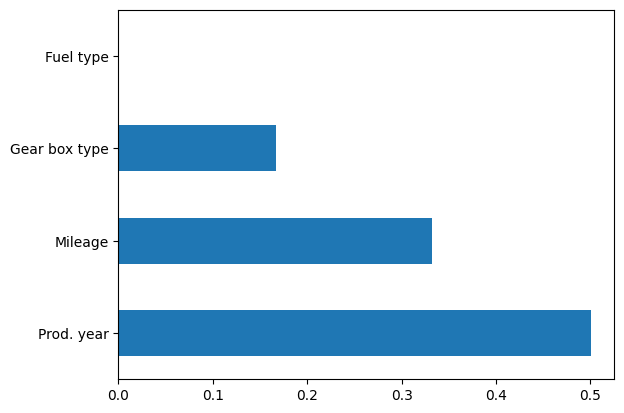

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load your dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
reg_model = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
print(reg_model)

# Fit the model on Training Data
DT = reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate model performance on Training Data (R-squared)
train_r2 = r2_score(y_train, reg_model.predict(X_train))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
accuracy_values = 100 + accuracy_values  # Convert negative to positive for accuracy

# Display model information and performance metrics
print(f"R2 Value: {train_r2}\n")
print("##### Model Validation and Accuracy Calculations ##########")
results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['PredictedPrice'] = y_pred

print(results_df.head())  # Display sample predictions

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {round(accuracy_values.mean(),2)}")



# Plotting/Visualising the Decision Tree

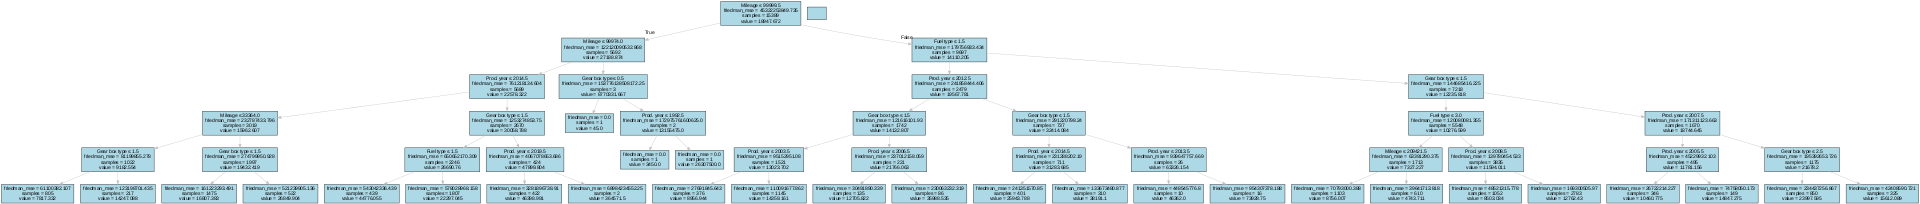

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
from io import StringIO

# Create DOT data
dot_data = StringIO()
tree.export_graphviz(reg_model, out_file=dot_data,
                     feature_names=predictors, class_names=target_variable,
                     filled=True, rounded=True, special_characters=True)

# Generate graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Customize graph properaties
graph.set_size('"20,20"')  # Increase graph size for better visibility

# Modify node and edge properties for better visualization
nodes = graph.get_node_list()
for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        node.set_fontsize(14)  # Increase node label font size
        node.set_fillcolor('lightblue')  # Set node fill color
        node.set_style('filled')

# Set edge properties
edges = graph.get_edge_list()
for edge in edges:
    edge.set_color('gray')  # Set edge color

# Show graph
Image(graph.create_png())


# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.7873260712857892

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    15148.272674
8674     3333.0        1997          1              1  10349     9944.847665
5971   212485.0        1996          5              1  40769     9174.427029
1957   132756.0        2014          1              0  38737    25912.290911
11075   50750.0        2017          5              0  42102    23510.862095

Mean Accuracy on test data: 79.75138013269846
Median Accuracy on test data: 79.75138013269846

Accuracy values for 10-fold Cross Validation:
[82.24282418 89.35099773 80.37950775 77.87027712 79.93793733 75.42993806
 83.89052104 -8.39632128 82.43862248 84.5736476 ]

Final Average Accuracy of the model: 72.77


<Axes: >

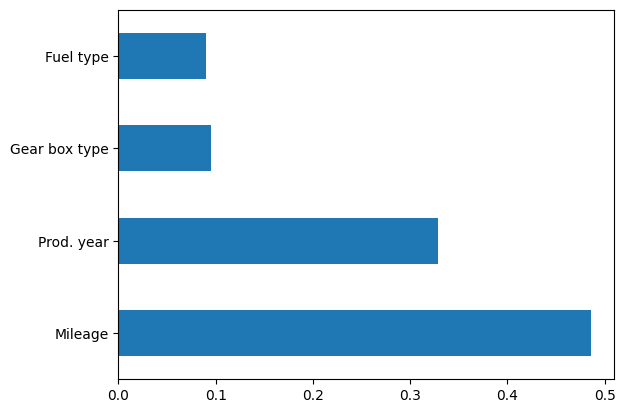

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load your dataset (replace the file path with your actual CSV file path)
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor model
reg_model = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='friedman_mse')
print(reg_model)

# Fit the model on Training Data
# Fit the model on Training Data
DT = reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate model performance on Training Data (R-squared)
train_r2 = r2_score(y_train, reg_model.predict(X_train))

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

# Prepare DataFrame for results and display model information and performance metrics

results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['PredictedPrice'] = y_pred

print(f"R2 Value: {train_r2}\n")
print("##### Model Validation and Accuracy Calculations ##########")
print(results_df.head())  # Display sample predictions

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
accuracy_values = 100 + accuracy_values  # Convert negative to positive for accuracy

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {round(accuracy_values.mean(), 2)}")

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Plotting One of the Decision Tree in Random Forest Regressor

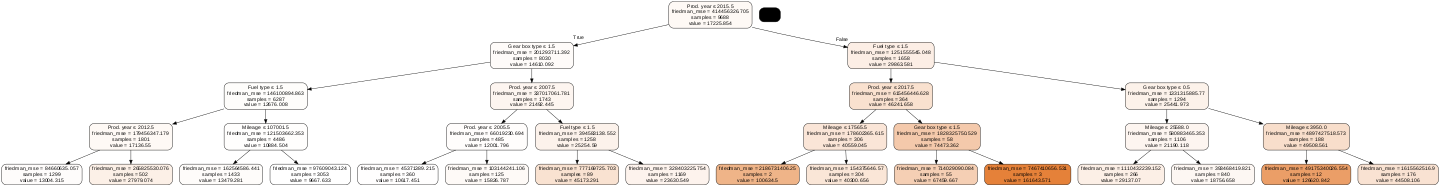

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load necessary libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Assuming reg_model is your trained RandomForestRegressor model

# Extract the 6th Decision Tree from the Random Forest
tree_to_plot = reg_model.estimators_[5]  # Change the index to plot a different tree if needed

# Define feature names and target variable name (for visualization)
feature_names = predictors
target_variable_name = target_variable

# Create DOT data for the decision tree
dot_data = tree.export_graphviz(tree_to_plot, out_file=None,
                                feature_names=feature_names,
                                class_names=[str(target_variable_name)],
                                filled=True, rounded=True, special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Set visualization parameters for better clarity and aesthetics
graph.set_size('"15,15"')  # Set the size of the graph
graph.set_fontsize(12)  # Set font size for node text

# Use a higher resolution to enhance image quality (optional)
image = graph.create_png()

# Show the decision tree graph using Image
Image(image)



## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(learning_rate=0.04, n_estimators=100)
R2 Value: 0.9120026701939308

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    13149.900905
8674     3333.0        1997          1              1  10349     6899.236534
5971   212485.0        1996          5              1  40769     7224.684058
1957   132756.0        2014          1              0  38737    13158.842580
11075   50750.0        2017          5              0  42102    26291.000000

Mean Accuracy on test data: 80.42706913880194
Median Accuracy on test data: 80.42706913880194

Accuracy values for 10-fold Cross Validation:
[80.20406897 87.80727841 78.8997155  74.77492206 80.87759154 78.82106196
 82.20346926 82.12487976 77.89739454 83.87400985]

Final Average Accuracy of the model: 80.75


<Axes: >

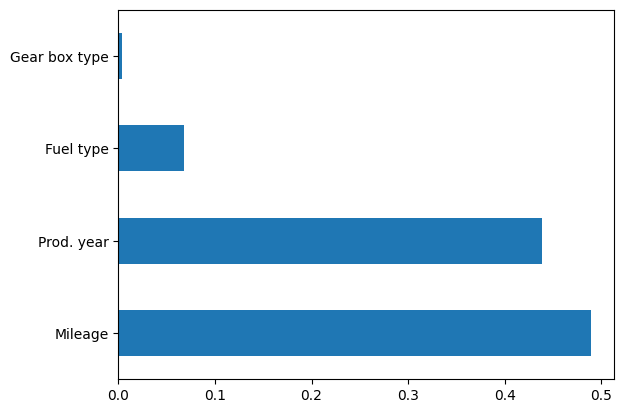

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
reg_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.04)

file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.04)

# Printing all the parameters of Adaboost
print(reg_model)

# Fit the model on Training Data
# Fit the model on Training Data
DT = reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate model performance on Training Data (R-squared)
train_r2 = r2_score(y_train, reg_model.predict(X_train))

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

# Prepare DataFrame for results and display model information and performance metrics

results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['PredictedPrice'] = y_pred

print(f"R2 Value: {train_r2}\n")
print("##### Model Validation and Accuracy Calculations ##########")
print(results_df.head())  # Display sample predictions

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
accuracy_values = 100 + accuracy_values  # Convert negative to positive for accuracy

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {round(accuracy_values.mean(), 2)}")

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')


# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 Value: 0.12452067274664702

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    15219.851562
8674    

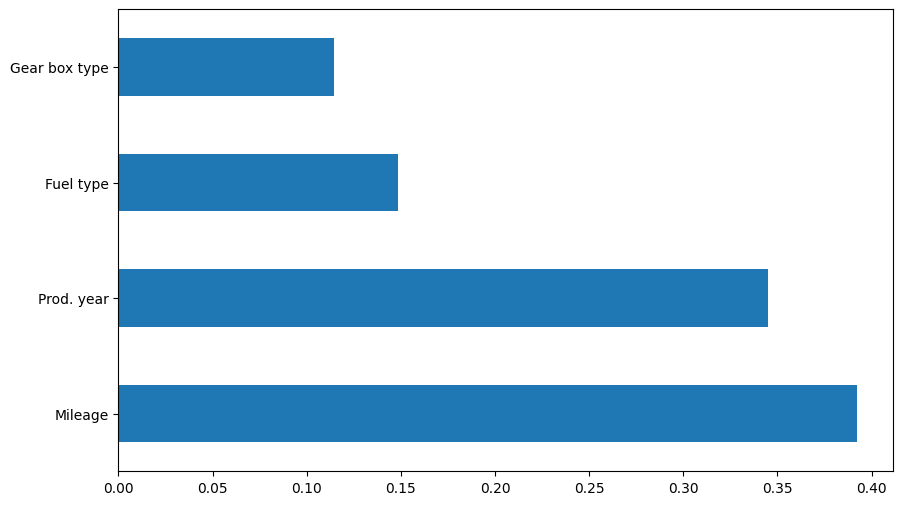

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor with specified parameters
reg_model = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective='reg:squarederror',  # Updated objective function
    booster='gbtree'
)

# Train the XGBoost model on Training Data
reg_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = reg_model.predict(X_test)

# Evaluate model performance on Training Data (R-squared)
train_r2 = r2_score(y_train, reg_model.predict(X_train))

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

# Prepare DataFrame for results and display model information and performance metrics
results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['Predicted' + target_variable] = y_pred

print(reg_model)  # Print XGBoost model parameters
print(f"R2 Value: {train_r2}\n")

print("##### Model Validation and Accuracy Calculations ##########")
print(results_df.head())  # Display sample predictions

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
accuracy_values = 100 + accuracy_values  # Convert negative to positive for accuracy

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {round(accuracy_values.mean(), 2)}")

# Plotting the feature importance for Top 10 most important columns
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(reg_model.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


#Plotting a single Decision tree out of XGBoost

<Axes: >

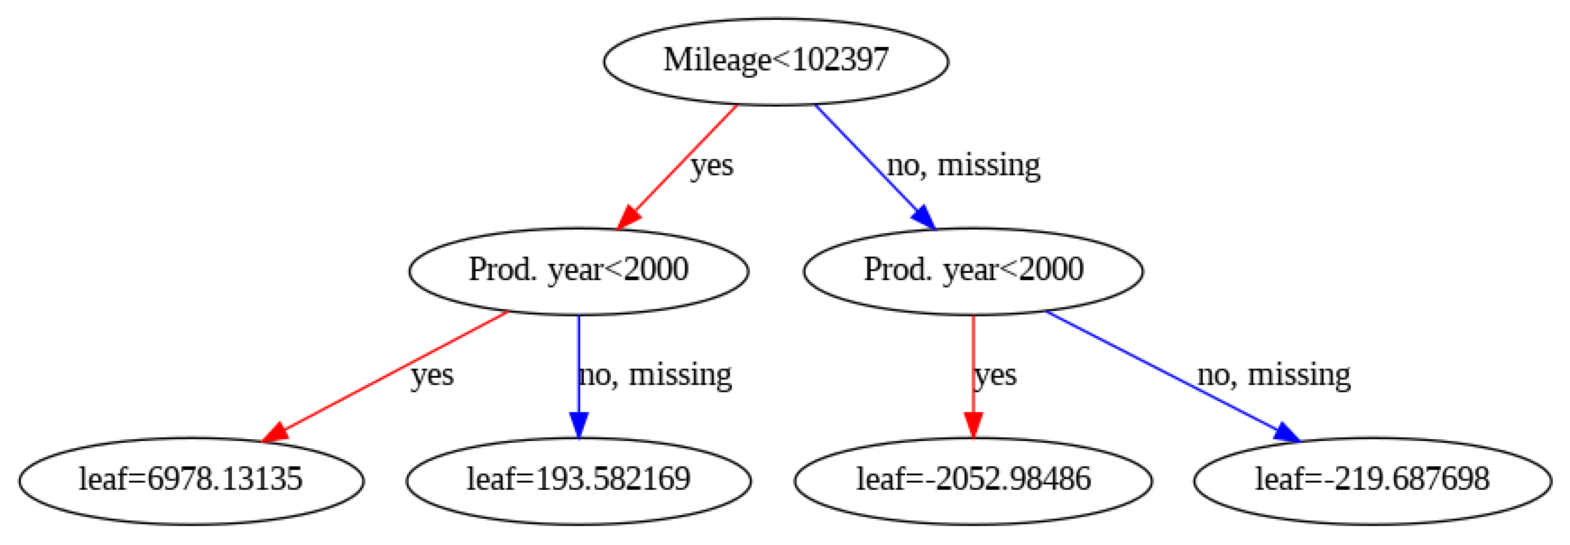

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(reg_model, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN regressor
regressor = KNeighborsRegressor(n_neighbors=3)  # Use n_neighbors=3 as specified

# Create a pipeline with feature scaling and KNN regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate R2 value (Goodness of fit on training data)
train_r2 = r2_score(y_train, pipeline.predict(X_train))

# Calculate mean absolute percentage error (MAPE) and accuracy metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

print("KNeighborsRegressor(n_neighbors=3)")
print(f"R2 Value: {train_r2}\n")

print("##### Model Validation and Accuracy Calculations ##########")
# Display sample predictions and metrics
results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['Predicted' + target_variable] = y_pred
print(results_df.head())

print(f"\nMean Accuracy on test data: {mean_accuracy}")
print(f"Median Accuracy on test data: {median_accuracy}\n")

# Perform 10-fold Cross Validation and calculate accuracy values
def accuracy_score(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 100 - np.mean(mape)

# Use custom scoring function with cross_val_score for accuracy calculation
accuracy_values = cross_val_score(pipeline, X, y, cv=10, scoring=make_scorer(accuracy_score))
final_avg_accuracy = np.mean(accuracy_values)

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {final_avg_accuracy:.2f}")


KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.3351185252073686

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    25193.333333
8674     3333.0        1997          1              1  10349    11763.333333
5971   212485.0        1996          5              1  40769     5746.333333
1957   132756.0        2014          1              0  38737    32434.333333
11075   50750.0        2017          5              0  42102     8885.666667

Mean Accuracy on test data: 80.16196253694488
Median Accuracy on test data: 80.16196253694488

Accuracy values for 10-fold Cross Validation:
[83.58119656 93.72544297 85.03004201 80.67273216 85.28615023 81.84218212
 84.19445372 88.29779501 85.65384935 86.73035674]

Final Average Accuracy of the model: 85.50


# Support Vector Machine (SVM) Regressor

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, make_scorer
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM regressor with rbf kernel
reg_model = svm.SVR(kernel='rbf')

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [1, 10, 50, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient for 'rbf' kernel
}

# Define custom scoring function for cross_val_score
def accuracy_score(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 100 - np.mean(mape)

# Create GridSearchCV object
grid_search = GridSearchCV(reg_model, param_grid, cv=10, scoring=make_scorer(accuracy_score))

# Fit GridSearchCV on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from GridSearchCV
best_estimator = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred = best_estimator.predict(X_test_scaled)

# Calculate R2 value (Goodness of fit on training data)
train_r2 = r2_score(y_train, best_estimator.predict(X_train_scaled))

# Calculate mean absolute percentage error (MAPE) and accuracy metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mean_accuracy = 100 - np.mean(mape)
median_accuracy = 100 - np.median(mape)

print(best_estimator)  # Print the best SVM regressor with optimized parameters
print(f"R2 Value: {train_r2}\n")

print("##### Model Validation and Accuracy Calculations ##########")
# Display sample predictions and metrics
results_df = pd.DataFrame(X_test, columns=predictors)
results_df[target_variable] = y_test
results_df['Predicted' + target_variable] = y_pred
print(results_df.head())

print(f"\nMean Accuracy on test data: {mean_accuracy:.2f}")
print(f"Median Accuracy on test data: {median_accuracy:.2f}\n")

# Perform 10-fold Cross Validation and calculate accuracy values
accuracy_values = cross_val_score(best_estimator, X, y, cv=10, scoring=make_scorer(accuracy_score))
final_avg_accuracy = np.mean(accuracy_values)

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {final_avg_accuracy:.2f}")


SVR(C=100, gamma=1)
R2 Value: 0.0007955918386062244

##### Model Validation and Accuracy Calculations ##########
        Mileage  Prod. year  Fuel type  Gear box type  Price  PredictedPrice
736     65000.0        2014          6              0  27284    14575.956406
8674     3333.0        1997          1              1  10349     8854.642878
5971   212485.0        1996          5              1  40769     5279.647142
1957   132756.0        2014          1              0  38737    27791.736665
11075   50750.0        2017          5              0  42102    16117.881985

Mean Accuracy on test data: 84.74
Median Accuracy on test data: 84.74

Accuracy values for 10-fold Cross Validation:
[83.82199914 89.87447224 85.43579554 83.756709   80.18557861 85.70659898
 84.37576767 82.47026261 81.30566062 87.14609226]

Final Average Accuracy of the model: 84.41


# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* I am choosing K-Nearest Neighbour as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* For this dataset, the most important predictor variables are 'Mileage', 'Prod. year', 'Fuel type', 'Gear box type'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset and extract relevant columns
file_path = 'car_price_prediction.csv'  # Replace with your actual file path
DataForML = pd.read_csv(file_path)

# Separate Target Variable and Predictor Variables
TargetVariable = 'Price'
Predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']

# Preprocessing 'Mileage' column to remove non-numeric characters
DataForML['Mileage'] = DataForML['Mileage'].str.replace(' km', '').astype(float)

# Extract X (predictors) and y (target variable)
X = DataForML[Predictors]
y = DataForML[TargetVariable]

# Define column transformer for preprocessing
# Apply OneHotEncoder to 'Fuel type' column to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Mileage', 'Prod. year']),  # Scale numerical columns
        ('cat', OneHotEncoder(), ['Fuel type'])  # Encode 'Fuel type' column
    ],
    remainder='passthrough'  # Pass through any remaining columns as they are
)

# Apply preprocessing and transformation to X
X_transformed = preprocessor.fit_transform(X)

print(X_transformed.shape)
print(y.shape)

(19237, 10)
(19237,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN regressor
regressor = KNeighborsRegressor(n_neighbors=3)  # Use n_neighbors=3 as specified

# Create a pipeline with feature scaling and KNN regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Perform 10-fold Cross Validation and calculate accuracy values
def accuracy_score(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 100 - np.mean(mape)

# Use custom scoring function with cross_val_score for accuracy calculation
accuracy_values = cross_val_score(pipeline, X, y, cv=10, scoring=make_scorer(accuracy_score))
final_avg_accuracy = np.mean(accuracy_values)

print("Accuracy values for 10-fold Cross Validation:")
print(accuracy_values)
print(f"\nFinal Average Accuracy of the model: {final_avg_accuracy:.2f}")


Accuracy values for 10-fold Cross Validation:
[87.84568746 93.03307555 84.58013896 79.17306847 86.50865936 88.91607231
 81.66291053 84.36240414 81.80029095 89.0384261 ]

Final Average Accuracy of the model: 85.69


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
from sklearn.neighbors import KNeighborsRegressor
reg_model = KNeighborsRegressor()
Final_KNN_Model= reg_model.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/CapstoneProject


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Mileage', 'Prod. year', 'Fuel type','Gear box type']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the car price prediction dataset
file_path = '/content/drive/MyDrive/CapstoneProject/car_price_prediction.csv'
car_data = pd.read_csv(file_path)

# Preprocess 'Mileage' column to convert strings to numeric values
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle categorical data ('Fuel type' column)
# Option 1: Label Encoding (if 'Fuel type' has ordinal relationship)
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])

# Handle 'Gear box type' column
# Option 1: Label Encoding (if 'Gear box type' has ordinal relationship)
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Option 2: One-Hot Encoding (if 'Gear box type' has no ordinal relationship)
# car_data = pd.get_dummies(car_data, columns=['Gear box type'], drop_first=True)

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=3)  # Use n_neighbors=3 as specified

# Fit the KNN model with training data
knn_model.fit(X_train_scaled, y_train)

# Define the input data for prediction (sample data)
NewSampleData = pd.DataFrame({
    'Mileage': [60000, 80000],
    'Prod. year': [2002, 1990],
    'Fuel type': [4, 2],
    'Gear box type': [1, 0]  # Add 'Gear box type' values
})
print(NewSampleData)
# Preprocess 'Mileage' column in NewSampleData (convert to float)
NewSampleData['Mileage'] = NewSampleData['Mileage'].astype(float)

# Scale the input features for prediction using the same scaler
NewSampleData_scaled = scaler.transform(NewSampleData)

# Make predictions on NewSampleData
predictions = knn_model.predict(NewSampleData_scaled)

# Create a DataFrame to display predictions
FunctionPredictResult = pd.DataFrame({'Prediction': predictions})

# Display the predictions in a table format
print(FunctionPredictResult)


   Mileage  Prod. year  Fuel type  Gear box type
0    60000        2002          4              1
1    80000        1990          2              0
    Prediction
0  8258.333333
1  6122.333333


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Desktop App deployment: Tkinter package

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'car_price_prediction.csv'  # Replace with your actual file path
car_data = pd.read_csv(file_path)

# Clean 'Mileage' column by removing non-numeric characters and converting to float
car_data['Mileage'] = car_data['Mileage'].str.replace(' km', '').astype(float)

# Handle missing values in 'Fuel type' column by filling with mode
mode_fuel_type = car_data['Fuel type'].mode()[0]
car_data['Fuel type'].fillna(mode_fuel_type, inplace=True)

# Use LabelEncoder to convert 'Fuel type' and 'Gear box type' to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_data['Fuel type'] = label_encoder.fit_transform(car_data['Fuel type'])
car_data['Gear box type'] = label_encoder.fit_transform(car_data['Gear box type'])

# Define predictors and target variable
predictors = ['Mileage', 'Prod. year', 'Fuel type', 'Gear box type']
target_variable = 'Price'

# Split data into features (X) and target variable (y)
X = car_data[predictors]
y = car_data[target_variable]

# Define the KNN regressor
regressor = KNeighborsRegressor(n_neighbors=3)  # Use n_neighbors=3 as specified

# Create a pipeline with feature scaling and KNN regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
])

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Define mappings for fuel type and gearbox type options
fuel_type_mapping = {'CNG': 0, 'Diesel': 1, 'Hybrid': 2, 'Hydrogen': 3, 'LPG': 4, 'Petrol': 5, 'Plug-in Hybrid': 6}
gearbox_type_mapping = {'Automatic': 0, 'Manual': 1, 'Tiptronic': 2, 'Variator': 3}

# Function to predict price
def predict_price():
    try:
        mileage = float(mileage_entry.get())
        prod_year = int(year_entry.get())
        fuel_type = fuel_var.get()
        gearbox_type = gearbox_var.get()

        # Map selected options to numerical values
        fuel_type = fuel_type_mapping[fuel_type]
        gearbox_type = gearbox_type_mapping[gearbox_type]

        # Predict price using the provided input
        price = pipeline.predict([[mileage, prod_year, fuel_type, gearbox_type]])

        # Display predicted price
        messagebox.showinfo("Predicted Price", f"The predicted price is: {price[0]:.2f}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid input")

# Function to exit the application
def exit_app():
    window.destroy()

# Create the main window
window = tk.Tk()
window.title("Car Price Prediction")

# Create input fields
mileage_label = tk.Label(window, text="Mileage:")
mileage_label.grid(row=0, column=0)
mileage_entry = tk.Entry(window)
mileage_entry.grid(row=0, column=1)

year_label = tk.Label(window, text="Production Year:")
year_label.grid(row=1, column=0)
year_entry = tk.Entry(window)
year_entry.grid(row=1, column=1)

fuel_label = tk.Label(window, text="Fuel Type:")
fuel_label.grid(row=2, column=0)
fuel_var = tk.StringVar(window)
fuel_options = ['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol', 'Plug-in Hybrid']
fuel_menu = tk.OptionMenu(window, fuel_var, *fuel_options)
fuel_menu.grid(row=2, column=1)

gearbox_label = tk.Label(window, text="Gearbox Type:")
gearbox_label.grid(row=3, column=0)
gearbox_var = tk.StringVar(window)
gearbox_options = ['Automatic', 'Manual', 'Tiptronic', 'Variator']
gearbox_menu = tk.OptionMenu(window, gearbox_var, *gearbox_options)
gearbox_menu.grid(row=3, column=1)

# Create predict button
predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=4, column=0, sticky="ew")

# Create exit button
exit_button = tk.Button(window, text="Exit", command=exit_app)
exit_button.grid(row=4, column=1, sticky="ew")

# Run the application
window.mainloop()
